In [18]:
import torch
from efficientnet_pytorch import EfficientNet
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from pathlib import Path

In [19]:
model_f = '/home/sharif/Documents/commai-challenge/trained_models/b3_on_all_validation/7_4000_3.7036566698551177.pth' #.pth file
sub_f = '/home/sharif/Documents/commai-challenge/submission.txt'

In [20]:
of_npy_files = '/home/sharif/Documents/RAFT/test_predictions'

In [21]:
# check if cuda is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Load Model

In [22]:
v = 3 # what version of efficientnet did you use
in_c = 2  # number of input channels
num_c = 1 # number of classes to predict

In [23]:
model = EfficientNet.from_pretrained(f'efficientnet-b{v}', in_channels=in_c, num_classes=num_c)
state = torch.load(model_f)
model.load_state_dict(state)
model.to(device)

Loaded pretrained weights for efficientnet-b3


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    2, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_siz

In [24]:
def inference(of_f):
    of = np.load(of_f)
    i = torch.from_numpy(of).to(device)
    pred = model(i)
    del i
    torch.cuda.empty_cache()
    return pred

In [25]:
n_f = len(list(Path(of_npy_files).glob('*.npy')))
for i in range(n_f):
    f = Path(of_npy_files) / Path(str(i) + '.npy')
    if i % 50 == 0: print(f)
    y_hat = inference(f)
    y_hat = y_hat.item()
    if y_hat < 0: y_hat = 0
    with open(sub_f, 'a') as out:
        out.write(str(y_hat) + '\n')

/home/sharif/Documents/RAFT/test_predictions/0.npy
/home/sharif/Documents/RAFT/test_predictions/1.npy
/home/sharif/Documents/RAFT/test_predictions/2.npy
/home/sharif/Documents/RAFT/test_predictions/3.npy
/home/sharif/Documents/RAFT/test_predictions/4.npy
/home/sharif/Documents/RAFT/test_predictions/5.npy
/home/sharif/Documents/RAFT/test_predictions/6.npy
/home/sharif/Documents/RAFT/test_predictions/7.npy
/home/sharif/Documents/RAFT/test_predictions/8.npy
/home/sharif/Documents/RAFT/test_predictions/9.npy
/home/sharif/Documents/RAFT/test_predictions/10.npy
/home/sharif/Documents/RAFT/test_predictions/11.npy
/home/sharif/Documents/RAFT/test_predictions/12.npy
/home/sharif/Documents/RAFT/test_predictions/13.npy
/home/sharif/Documents/RAFT/test_predictions/14.npy
/home/sharif/Documents/RAFT/test_predictions/15.npy
/home/sharif/Documents/RAFT/test_predictions/16.npy
/home/sharif/Documents/RAFT/test_predictions/17.npy
/home/sharif/Documents/RAFT/test_predictions/18.npy
/home/sharif/Documents

/home/sharif/Documents/RAFT/test_predictions/159.npy
/home/sharif/Documents/RAFT/test_predictions/160.npy
/home/sharif/Documents/RAFT/test_predictions/161.npy
/home/sharif/Documents/RAFT/test_predictions/162.npy
/home/sharif/Documents/RAFT/test_predictions/163.npy
/home/sharif/Documents/RAFT/test_predictions/164.npy
/home/sharif/Documents/RAFT/test_predictions/165.npy
/home/sharif/Documents/RAFT/test_predictions/166.npy
/home/sharif/Documents/RAFT/test_predictions/167.npy
/home/sharif/Documents/RAFT/test_predictions/168.npy
/home/sharif/Documents/RAFT/test_predictions/169.npy
/home/sharif/Documents/RAFT/test_predictions/170.npy
/home/sharif/Documents/RAFT/test_predictions/171.npy
/home/sharif/Documents/RAFT/test_predictions/172.npy
/home/sharif/Documents/RAFT/test_predictions/173.npy
/home/sharif/Documents/RAFT/test_predictions/174.npy
/home/sharif/Documents/RAFT/test_predictions/175.npy
/home/sharif/Documents/RAFT/test_predictions/176.npy
/home/sharif/Documents/RAFT/test_predictions/1

/home/sharif/Documents/RAFT/test_predictions/318.npy
/home/sharif/Documents/RAFT/test_predictions/319.npy
/home/sharif/Documents/RAFT/test_predictions/320.npy
/home/sharif/Documents/RAFT/test_predictions/321.npy
/home/sharif/Documents/RAFT/test_predictions/322.npy
/home/sharif/Documents/RAFT/test_predictions/323.npy
/home/sharif/Documents/RAFT/test_predictions/324.npy
/home/sharif/Documents/RAFT/test_predictions/325.npy
/home/sharif/Documents/RAFT/test_predictions/326.npy
/home/sharif/Documents/RAFT/test_predictions/327.npy
/home/sharif/Documents/RAFT/test_predictions/328.npy
/home/sharif/Documents/RAFT/test_predictions/329.npy
/home/sharif/Documents/RAFT/test_predictions/330.npy
/home/sharif/Documents/RAFT/test_predictions/331.npy
/home/sharif/Documents/RAFT/test_predictions/332.npy
/home/sharif/Documents/RAFT/test_predictions/333.npy
/home/sharif/Documents/RAFT/test_predictions/334.npy
/home/sharif/Documents/RAFT/test_predictions/335.npy
/home/sharif/Documents/RAFT/test_predictions/3

/home/sharif/Documents/RAFT/test_predictions/473.npy
/home/sharif/Documents/RAFT/test_predictions/474.npy
/home/sharif/Documents/RAFT/test_predictions/475.npy
/home/sharif/Documents/RAFT/test_predictions/476.npy
/home/sharif/Documents/RAFT/test_predictions/477.npy
/home/sharif/Documents/RAFT/test_predictions/478.npy
/home/sharif/Documents/RAFT/test_predictions/479.npy
/home/sharif/Documents/RAFT/test_predictions/480.npy
/home/sharif/Documents/RAFT/test_predictions/481.npy
/home/sharif/Documents/RAFT/test_predictions/482.npy
/home/sharif/Documents/RAFT/test_predictions/483.npy
/home/sharif/Documents/RAFT/test_predictions/484.npy
/home/sharif/Documents/RAFT/test_predictions/485.npy
/home/sharif/Documents/RAFT/test_predictions/486.npy
/home/sharif/Documents/RAFT/test_predictions/487.npy
/home/sharif/Documents/RAFT/test_predictions/488.npy
/home/sharif/Documents/RAFT/test_predictions/489.npy
/home/sharif/Documents/RAFT/test_predictions/490.npy
/home/sharif/Documents/RAFT/test_predictions/4

/home/sharif/Documents/RAFT/test_predictions/628.npy
/home/sharif/Documents/RAFT/test_predictions/629.npy
/home/sharif/Documents/RAFT/test_predictions/630.npy
/home/sharif/Documents/RAFT/test_predictions/631.npy
/home/sharif/Documents/RAFT/test_predictions/632.npy
/home/sharif/Documents/RAFT/test_predictions/633.npy
/home/sharif/Documents/RAFT/test_predictions/634.npy
/home/sharif/Documents/RAFT/test_predictions/635.npy
/home/sharif/Documents/RAFT/test_predictions/636.npy
/home/sharif/Documents/RAFT/test_predictions/637.npy
/home/sharif/Documents/RAFT/test_predictions/638.npy
/home/sharif/Documents/RAFT/test_predictions/639.npy
/home/sharif/Documents/RAFT/test_predictions/640.npy
/home/sharif/Documents/RAFT/test_predictions/641.npy
/home/sharif/Documents/RAFT/test_predictions/642.npy
/home/sharif/Documents/RAFT/test_predictions/643.npy
/home/sharif/Documents/RAFT/test_predictions/644.npy
/home/sharif/Documents/RAFT/test_predictions/645.npy
/home/sharif/Documents/RAFT/test_predictions/6

/home/sharif/Documents/RAFT/test_predictions/785.npy
/home/sharif/Documents/RAFT/test_predictions/786.npy
/home/sharif/Documents/RAFT/test_predictions/787.npy
/home/sharif/Documents/RAFT/test_predictions/788.npy
/home/sharif/Documents/RAFT/test_predictions/789.npy
/home/sharif/Documents/RAFT/test_predictions/790.npy
/home/sharif/Documents/RAFT/test_predictions/791.npy
/home/sharif/Documents/RAFT/test_predictions/792.npy
/home/sharif/Documents/RAFT/test_predictions/793.npy
/home/sharif/Documents/RAFT/test_predictions/794.npy
/home/sharif/Documents/RAFT/test_predictions/795.npy
/home/sharif/Documents/RAFT/test_predictions/796.npy
/home/sharif/Documents/RAFT/test_predictions/797.npy
/home/sharif/Documents/RAFT/test_predictions/798.npy
/home/sharif/Documents/RAFT/test_predictions/799.npy
/home/sharif/Documents/RAFT/test_predictions/800.npy
/home/sharif/Documents/RAFT/test_predictions/801.npy
/home/sharif/Documents/RAFT/test_predictions/802.npy
/home/sharif/Documents/RAFT/test_predictions/8

/home/sharif/Documents/RAFT/test_predictions/940.npy
/home/sharif/Documents/RAFT/test_predictions/941.npy
/home/sharif/Documents/RAFT/test_predictions/942.npy
/home/sharif/Documents/RAFT/test_predictions/943.npy
/home/sharif/Documents/RAFT/test_predictions/944.npy
/home/sharif/Documents/RAFT/test_predictions/945.npy
/home/sharif/Documents/RAFT/test_predictions/946.npy
/home/sharif/Documents/RAFT/test_predictions/947.npy
/home/sharif/Documents/RAFT/test_predictions/948.npy
/home/sharif/Documents/RAFT/test_predictions/949.npy
/home/sharif/Documents/RAFT/test_predictions/950.npy
/home/sharif/Documents/RAFT/test_predictions/951.npy
/home/sharif/Documents/RAFT/test_predictions/952.npy
/home/sharif/Documents/RAFT/test_predictions/953.npy
/home/sharif/Documents/RAFT/test_predictions/954.npy
/home/sharif/Documents/RAFT/test_predictions/955.npy
/home/sharif/Documents/RAFT/test_predictions/956.npy
/home/sharif/Documents/RAFT/test_predictions/957.npy
/home/sharif/Documents/RAFT/test_predictions/9

/home/sharif/Documents/RAFT/test_predictions/1094.npy
/home/sharif/Documents/RAFT/test_predictions/1095.npy
/home/sharif/Documents/RAFT/test_predictions/1096.npy
/home/sharif/Documents/RAFT/test_predictions/1097.npy
/home/sharif/Documents/RAFT/test_predictions/1098.npy
/home/sharif/Documents/RAFT/test_predictions/1099.npy
/home/sharif/Documents/RAFT/test_predictions/1100.npy
/home/sharif/Documents/RAFT/test_predictions/1101.npy
/home/sharif/Documents/RAFT/test_predictions/1102.npy
/home/sharif/Documents/RAFT/test_predictions/1103.npy
/home/sharif/Documents/RAFT/test_predictions/1104.npy
/home/sharif/Documents/RAFT/test_predictions/1105.npy
/home/sharif/Documents/RAFT/test_predictions/1106.npy
/home/sharif/Documents/RAFT/test_predictions/1107.npy
/home/sharif/Documents/RAFT/test_predictions/1108.npy
/home/sharif/Documents/RAFT/test_predictions/1109.npy
/home/sharif/Documents/RAFT/test_predictions/1110.npy
/home/sharif/Documents/RAFT/test_predictions/1111.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/1247.npy
/home/sharif/Documents/RAFT/test_predictions/1248.npy
/home/sharif/Documents/RAFT/test_predictions/1249.npy
/home/sharif/Documents/RAFT/test_predictions/1250.npy
/home/sharif/Documents/RAFT/test_predictions/1251.npy
/home/sharif/Documents/RAFT/test_predictions/1252.npy
/home/sharif/Documents/RAFT/test_predictions/1253.npy
/home/sharif/Documents/RAFT/test_predictions/1254.npy
/home/sharif/Documents/RAFT/test_predictions/1255.npy
/home/sharif/Documents/RAFT/test_predictions/1256.npy
/home/sharif/Documents/RAFT/test_predictions/1257.npy
/home/sharif/Documents/RAFT/test_predictions/1258.npy
/home/sharif/Documents/RAFT/test_predictions/1259.npy
/home/sharif/Documents/RAFT/test_predictions/1260.npy
/home/sharif/Documents/RAFT/test_predictions/1261.npy
/home/sharif/Documents/RAFT/test_predictions/1262.npy
/home/sharif/Documents/RAFT/test_predictions/1263.npy
/home/sharif/Documents/RAFT/test_predictions/1264.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/1401.npy
/home/sharif/Documents/RAFT/test_predictions/1402.npy
/home/sharif/Documents/RAFT/test_predictions/1403.npy
/home/sharif/Documents/RAFT/test_predictions/1404.npy
/home/sharif/Documents/RAFT/test_predictions/1405.npy
/home/sharif/Documents/RAFT/test_predictions/1406.npy
/home/sharif/Documents/RAFT/test_predictions/1407.npy
/home/sharif/Documents/RAFT/test_predictions/1408.npy
/home/sharif/Documents/RAFT/test_predictions/1409.npy
/home/sharif/Documents/RAFT/test_predictions/1410.npy
/home/sharif/Documents/RAFT/test_predictions/1411.npy
/home/sharif/Documents/RAFT/test_predictions/1412.npy
/home/sharif/Documents/RAFT/test_predictions/1413.npy
/home/sharif/Documents/RAFT/test_predictions/1414.npy
/home/sharif/Documents/RAFT/test_predictions/1415.npy
/home/sharif/Documents/RAFT/test_predictions/1416.npy
/home/sharif/Documents/RAFT/test_predictions/1417.npy
/home/sharif/Documents/RAFT/test_predictions/1418.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/1555.npy
/home/sharif/Documents/RAFT/test_predictions/1556.npy
/home/sharif/Documents/RAFT/test_predictions/1557.npy
/home/sharif/Documents/RAFT/test_predictions/1558.npy
/home/sharif/Documents/RAFT/test_predictions/1559.npy
/home/sharif/Documents/RAFT/test_predictions/1560.npy
/home/sharif/Documents/RAFT/test_predictions/1561.npy
/home/sharif/Documents/RAFT/test_predictions/1562.npy
/home/sharif/Documents/RAFT/test_predictions/1563.npy
/home/sharif/Documents/RAFT/test_predictions/1564.npy
/home/sharif/Documents/RAFT/test_predictions/1565.npy
/home/sharif/Documents/RAFT/test_predictions/1566.npy
/home/sharif/Documents/RAFT/test_predictions/1567.npy
/home/sharif/Documents/RAFT/test_predictions/1568.npy
/home/sharif/Documents/RAFT/test_predictions/1569.npy
/home/sharif/Documents/RAFT/test_predictions/1570.npy
/home/sharif/Documents/RAFT/test_predictions/1571.npy
/home/sharif/Documents/RAFT/test_predictions/1572.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/1710.npy
/home/sharif/Documents/RAFT/test_predictions/1711.npy
/home/sharif/Documents/RAFT/test_predictions/1712.npy
/home/sharif/Documents/RAFT/test_predictions/1713.npy
/home/sharif/Documents/RAFT/test_predictions/1714.npy
/home/sharif/Documents/RAFT/test_predictions/1715.npy
/home/sharif/Documents/RAFT/test_predictions/1716.npy
/home/sharif/Documents/RAFT/test_predictions/1717.npy
/home/sharif/Documents/RAFT/test_predictions/1718.npy
/home/sharif/Documents/RAFT/test_predictions/1719.npy
/home/sharif/Documents/RAFT/test_predictions/1720.npy
/home/sharif/Documents/RAFT/test_predictions/1721.npy
/home/sharif/Documents/RAFT/test_predictions/1722.npy
/home/sharif/Documents/RAFT/test_predictions/1723.npy
/home/sharif/Documents/RAFT/test_predictions/1724.npy
/home/sharif/Documents/RAFT/test_predictions/1725.npy
/home/sharif/Documents/RAFT/test_predictions/1726.npy
/home/sharif/Documents/RAFT/test_predictions/1727.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/1864.npy
/home/sharif/Documents/RAFT/test_predictions/1865.npy
/home/sharif/Documents/RAFT/test_predictions/1866.npy
/home/sharif/Documents/RAFT/test_predictions/1867.npy
/home/sharif/Documents/RAFT/test_predictions/1868.npy
/home/sharif/Documents/RAFT/test_predictions/1869.npy
/home/sharif/Documents/RAFT/test_predictions/1870.npy
/home/sharif/Documents/RAFT/test_predictions/1871.npy
/home/sharif/Documents/RAFT/test_predictions/1872.npy
/home/sharif/Documents/RAFT/test_predictions/1873.npy
/home/sharif/Documents/RAFT/test_predictions/1874.npy
/home/sharif/Documents/RAFT/test_predictions/1875.npy
/home/sharif/Documents/RAFT/test_predictions/1876.npy
/home/sharif/Documents/RAFT/test_predictions/1877.npy
/home/sharif/Documents/RAFT/test_predictions/1878.npy
/home/sharif/Documents/RAFT/test_predictions/1879.npy
/home/sharif/Documents/RAFT/test_predictions/1880.npy
/home/sharif/Documents/RAFT/test_predictions/1881.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/2018.npy
/home/sharif/Documents/RAFT/test_predictions/2019.npy
/home/sharif/Documents/RAFT/test_predictions/2020.npy
/home/sharif/Documents/RAFT/test_predictions/2021.npy
/home/sharif/Documents/RAFT/test_predictions/2022.npy
/home/sharif/Documents/RAFT/test_predictions/2023.npy
/home/sharif/Documents/RAFT/test_predictions/2024.npy
/home/sharif/Documents/RAFT/test_predictions/2025.npy
/home/sharif/Documents/RAFT/test_predictions/2026.npy
/home/sharif/Documents/RAFT/test_predictions/2027.npy
/home/sharif/Documents/RAFT/test_predictions/2028.npy
/home/sharif/Documents/RAFT/test_predictions/2029.npy
/home/sharif/Documents/RAFT/test_predictions/2030.npy
/home/sharif/Documents/RAFT/test_predictions/2031.npy
/home/sharif/Documents/RAFT/test_predictions/2032.npy
/home/sharif/Documents/RAFT/test_predictions/2033.npy
/home/sharif/Documents/RAFT/test_predictions/2034.npy
/home/sharif/Documents/RAFT/test_predictions/2035.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/2171.npy
/home/sharif/Documents/RAFT/test_predictions/2172.npy
/home/sharif/Documents/RAFT/test_predictions/2173.npy
/home/sharif/Documents/RAFT/test_predictions/2174.npy
/home/sharif/Documents/RAFT/test_predictions/2175.npy
/home/sharif/Documents/RAFT/test_predictions/2176.npy
/home/sharif/Documents/RAFT/test_predictions/2177.npy
/home/sharif/Documents/RAFT/test_predictions/2178.npy
/home/sharif/Documents/RAFT/test_predictions/2179.npy
/home/sharif/Documents/RAFT/test_predictions/2180.npy
/home/sharif/Documents/RAFT/test_predictions/2181.npy
/home/sharif/Documents/RAFT/test_predictions/2182.npy
/home/sharif/Documents/RAFT/test_predictions/2183.npy
/home/sharif/Documents/RAFT/test_predictions/2184.npy
/home/sharif/Documents/RAFT/test_predictions/2185.npy
/home/sharif/Documents/RAFT/test_predictions/2186.npy
/home/sharif/Documents/RAFT/test_predictions/2187.npy
/home/sharif/Documents/RAFT/test_predictions/2188.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/2324.npy
/home/sharif/Documents/RAFT/test_predictions/2325.npy
/home/sharif/Documents/RAFT/test_predictions/2326.npy
/home/sharif/Documents/RAFT/test_predictions/2327.npy
/home/sharif/Documents/RAFT/test_predictions/2328.npy
/home/sharif/Documents/RAFT/test_predictions/2329.npy
/home/sharif/Documents/RAFT/test_predictions/2330.npy
/home/sharif/Documents/RAFT/test_predictions/2331.npy
/home/sharif/Documents/RAFT/test_predictions/2332.npy
/home/sharif/Documents/RAFT/test_predictions/2333.npy
/home/sharif/Documents/RAFT/test_predictions/2334.npy
/home/sharif/Documents/RAFT/test_predictions/2335.npy
/home/sharif/Documents/RAFT/test_predictions/2336.npy
/home/sharif/Documents/RAFT/test_predictions/2337.npy
/home/sharif/Documents/RAFT/test_predictions/2338.npy
/home/sharif/Documents/RAFT/test_predictions/2339.npy
/home/sharif/Documents/RAFT/test_predictions/2340.npy
/home/sharif/Documents/RAFT/test_predictions/2341.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/2476.npy
/home/sharif/Documents/RAFT/test_predictions/2477.npy
/home/sharif/Documents/RAFT/test_predictions/2478.npy
/home/sharif/Documents/RAFT/test_predictions/2479.npy
/home/sharif/Documents/RAFT/test_predictions/2480.npy
/home/sharif/Documents/RAFT/test_predictions/2481.npy
/home/sharif/Documents/RAFT/test_predictions/2482.npy
/home/sharif/Documents/RAFT/test_predictions/2483.npy
/home/sharif/Documents/RAFT/test_predictions/2484.npy
/home/sharif/Documents/RAFT/test_predictions/2485.npy
/home/sharif/Documents/RAFT/test_predictions/2486.npy
/home/sharif/Documents/RAFT/test_predictions/2487.npy
/home/sharif/Documents/RAFT/test_predictions/2488.npy
/home/sharif/Documents/RAFT/test_predictions/2489.npy
/home/sharif/Documents/RAFT/test_predictions/2490.npy
/home/sharif/Documents/RAFT/test_predictions/2491.npy
/home/sharif/Documents/RAFT/test_predictions/2492.npy
/home/sharif/Documents/RAFT/test_predictions/2493.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/2629.npy
/home/sharif/Documents/RAFT/test_predictions/2630.npy
/home/sharif/Documents/RAFT/test_predictions/2631.npy
/home/sharif/Documents/RAFT/test_predictions/2632.npy
/home/sharif/Documents/RAFT/test_predictions/2633.npy
/home/sharif/Documents/RAFT/test_predictions/2634.npy
/home/sharif/Documents/RAFT/test_predictions/2635.npy
/home/sharif/Documents/RAFT/test_predictions/2636.npy
/home/sharif/Documents/RAFT/test_predictions/2637.npy
/home/sharif/Documents/RAFT/test_predictions/2638.npy
/home/sharif/Documents/RAFT/test_predictions/2639.npy
/home/sharif/Documents/RAFT/test_predictions/2640.npy
/home/sharif/Documents/RAFT/test_predictions/2641.npy
/home/sharif/Documents/RAFT/test_predictions/2642.npy
/home/sharif/Documents/RAFT/test_predictions/2643.npy
/home/sharif/Documents/RAFT/test_predictions/2644.npy
/home/sharif/Documents/RAFT/test_predictions/2645.npy
/home/sharif/Documents/RAFT/test_predictions/2646.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/2782.npy
/home/sharif/Documents/RAFT/test_predictions/2783.npy
/home/sharif/Documents/RAFT/test_predictions/2784.npy
/home/sharif/Documents/RAFT/test_predictions/2785.npy
/home/sharif/Documents/RAFT/test_predictions/2786.npy
/home/sharif/Documents/RAFT/test_predictions/2787.npy
/home/sharif/Documents/RAFT/test_predictions/2788.npy
/home/sharif/Documents/RAFT/test_predictions/2789.npy
/home/sharif/Documents/RAFT/test_predictions/2790.npy
/home/sharif/Documents/RAFT/test_predictions/2791.npy
/home/sharif/Documents/RAFT/test_predictions/2792.npy
/home/sharif/Documents/RAFT/test_predictions/2793.npy
/home/sharif/Documents/RAFT/test_predictions/2794.npy
/home/sharif/Documents/RAFT/test_predictions/2795.npy
/home/sharif/Documents/RAFT/test_predictions/2796.npy
/home/sharif/Documents/RAFT/test_predictions/2797.npy
/home/sharif/Documents/RAFT/test_predictions/2798.npy
/home/sharif/Documents/RAFT/test_predictions/2799.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/2937.npy
/home/sharif/Documents/RAFT/test_predictions/2938.npy
/home/sharif/Documents/RAFT/test_predictions/2939.npy
/home/sharif/Documents/RAFT/test_predictions/2940.npy
/home/sharif/Documents/RAFT/test_predictions/2941.npy
/home/sharif/Documents/RAFT/test_predictions/2942.npy
/home/sharif/Documents/RAFT/test_predictions/2943.npy
/home/sharif/Documents/RAFT/test_predictions/2944.npy
/home/sharif/Documents/RAFT/test_predictions/2945.npy
/home/sharif/Documents/RAFT/test_predictions/2946.npy
/home/sharif/Documents/RAFT/test_predictions/2947.npy
/home/sharif/Documents/RAFT/test_predictions/2948.npy
/home/sharif/Documents/RAFT/test_predictions/2949.npy
/home/sharif/Documents/RAFT/test_predictions/2950.npy
/home/sharif/Documents/RAFT/test_predictions/2951.npy
/home/sharif/Documents/RAFT/test_predictions/2952.npy
/home/sharif/Documents/RAFT/test_predictions/2953.npy
/home/sharif/Documents/RAFT/test_predictions/2954.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/3089.npy
/home/sharif/Documents/RAFT/test_predictions/3090.npy
/home/sharif/Documents/RAFT/test_predictions/3091.npy
/home/sharif/Documents/RAFT/test_predictions/3092.npy
/home/sharif/Documents/RAFT/test_predictions/3093.npy
/home/sharif/Documents/RAFT/test_predictions/3094.npy
/home/sharif/Documents/RAFT/test_predictions/3095.npy
/home/sharif/Documents/RAFT/test_predictions/3096.npy
/home/sharif/Documents/RAFT/test_predictions/3097.npy
/home/sharif/Documents/RAFT/test_predictions/3098.npy
/home/sharif/Documents/RAFT/test_predictions/3099.npy
/home/sharif/Documents/RAFT/test_predictions/3100.npy
/home/sharif/Documents/RAFT/test_predictions/3101.npy
/home/sharif/Documents/RAFT/test_predictions/3102.npy
/home/sharif/Documents/RAFT/test_predictions/3103.npy
/home/sharif/Documents/RAFT/test_predictions/3104.npy
/home/sharif/Documents/RAFT/test_predictions/3105.npy
/home/sharif/Documents/RAFT/test_predictions/3106.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/3243.npy
/home/sharif/Documents/RAFT/test_predictions/3244.npy
/home/sharif/Documents/RAFT/test_predictions/3245.npy
/home/sharif/Documents/RAFT/test_predictions/3246.npy
/home/sharif/Documents/RAFT/test_predictions/3247.npy
/home/sharif/Documents/RAFT/test_predictions/3248.npy
/home/sharif/Documents/RAFT/test_predictions/3249.npy
/home/sharif/Documents/RAFT/test_predictions/3250.npy
/home/sharif/Documents/RAFT/test_predictions/3251.npy
/home/sharif/Documents/RAFT/test_predictions/3252.npy
/home/sharif/Documents/RAFT/test_predictions/3253.npy
/home/sharif/Documents/RAFT/test_predictions/3254.npy
/home/sharif/Documents/RAFT/test_predictions/3255.npy
/home/sharif/Documents/RAFT/test_predictions/3256.npy
/home/sharif/Documents/RAFT/test_predictions/3257.npy
/home/sharif/Documents/RAFT/test_predictions/3258.npy
/home/sharif/Documents/RAFT/test_predictions/3259.npy
/home/sharif/Documents/RAFT/test_predictions/3260.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/3395.npy
/home/sharif/Documents/RAFT/test_predictions/3396.npy
/home/sharif/Documents/RAFT/test_predictions/3397.npy
/home/sharif/Documents/RAFT/test_predictions/3398.npy
/home/sharif/Documents/RAFT/test_predictions/3399.npy
/home/sharif/Documents/RAFT/test_predictions/3400.npy
/home/sharif/Documents/RAFT/test_predictions/3401.npy
/home/sharif/Documents/RAFT/test_predictions/3402.npy
/home/sharif/Documents/RAFT/test_predictions/3403.npy
/home/sharif/Documents/RAFT/test_predictions/3404.npy
/home/sharif/Documents/RAFT/test_predictions/3405.npy
/home/sharif/Documents/RAFT/test_predictions/3406.npy
/home/sharif/Documents/RAFT/test_predictions/3407.npy
/home/sharif/Documents/RAFT/test_predictions/3408.npy
/home/sharif/Documents/RAFT/test_predictions/3409.npy
/home/sharif/Documents/RAFT/test_predictions/3410.npy
/home/sharif/Documents/RAFT/test_predictions/3411.npy
/home/sharif/Documents/RAFT/test_predictions/3412.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/3550.npy
/home/sharif/Documents/RAFT/test_predictions/3551.npy
/home/sharif/Documents/RAFT/test_predictions/3552.npy
/home/sharif/Documents/RAFT/test_predictions/3553.npy
/home/sharif/Documents/RAFT/test_predictions/3554.npy
/home/sharif/Documents/RAFT/test_predictions/3555.npy
/home/sharif/Documents/RAFT/test_predictions/3556.npy
/home/sharif/Documents/RAFT/test_predictions/3557.npy
/home/sharif/Documents/RAFT/test_predictions/3558.npy
/home/sharif/Documents/RAFT/test_predictions/3559.npy
/home/sharif/Documents/RAFT/test_predictions/3560.npy
/home/sharif/Documents/RAFT/test_predictions/3561.npy
/home/sharif/Documents/RAFT/test_predictions/3562.npy
/home/sharif/Documents/RAFT/test_predictions/3563.npy
/home/sharif/Documents/RAFT/test_predictions/3564.npy
/home/sharif/Documents/RAFT/test_predictions/3565.npy
/home/sharif/Documents/RAFT/test_predictions/3566.npy
/home/sharif/Documents/RAFT/test_predictions/3567.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/3705.npy
/home/sharif/Documents/RAFT/test_predictions/3706.npy
/home/sharif/Documents/RAFT/test_predictions/3707.npy
/home/sharif/Documents/RAFT/test_predictions/3708.npy
/home/sharif/Documents/RAFT/test_predictions/3709.npy
/home/sharif/Documents/RAFT/test_predictions/3710.npy
/home/sharif/Documents/RAFT/test_predictions/3711.npy
/home/sharif/Documents/RAFT/test_predictions/3712.npy
/home/sharif/Documents/RAFT/test_predictions/3713.npy
/home/sharif/Documents/RAFT/test_predictions/3714.npy
/home/sharif/Documents/RAFT/test_predictions/3715.npy
/home/sharif/Documents/RAFT/test_predictions/3716.npy
/home/sharif/Documents/RAFT/test_predictions/3717.npy
/home/sharif/Documents/RAFT/test_predictions/3718.npy
/home/sharif/Documents/RAFT/test_predictions/3719.npy
/home/sharif/Documents/RAFT/test_predictions/3720.npy
/home/sharif/Documents/RAFT/test_predictions/3721.npy
/home/sharif/Documents/RAFT/test_predictions/3722.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/3859.npy
/home/sharif/Documents/RAFT/test_predictions/3860.npy
/home/sharif/Documents/RAFT/test_predictions/3861.npy
/home/sharif/Documents/RAFT/test_predictions/3862.npy
/home/sharif/Documents/RAFT/test_predictions/3863.npy
/home/sharif/Documents/RAFT/test_predictions/3864.npy
/home/sharif/Documents/RAFT/test_predictions/3865.npy
/home/sharif/Documents/RAFT/test_predictions/3866.npy
/home/sharif/Documents/RAFT/test_predictions/3867.npy
/home/sharif/Documents/RAFT/test_predictions/3868.npy
/home/sharif/Documents/RAFT/test_predictions/3869.npy
/home/sharif/Documents/RAFT/test_predictions/3870.npy
/home/sharif/Documents/RAFT/test_predictions/3871.npy
/home/sharif/Documents/RAFT/test_predictions/3872.npy
/home/sharif/Documents/RAFT/test_predictions/3873.npy
/home/sharif/Documents/RAFT/test_predictions/3874.npy
/home/sharif/Documents/RAFT/test_predictions/3875.npy
/home/sharif/Documents/RAFT/test_predictions/3876.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/4012.npy
/home/sharif/Documents/RAFT/test_predictions/4013.npy
/home/sharif/Documents/RAFT/test_predictions/4014.npy
/home/sharif/Documents/RAFT/test_predictions/4015.npy
/home/sharif/Documents/RAFT/test_predictions/4016.npy
/home/sharif/Documents/RAFT/test_predictions/4017.npy
/home/sharif/Documents/RAFT/test_predictions/4018.npy
/home/sharif/Documents/RAFT/test_predictions/4019.npy
/home/sharif/Documents/RAFT/test_predictions/4020.npy
/home/sharif/Documents/RAFT/test_predictions/4021.npy
/home/sharif/Documents/RAFT/test_predictions/4022.npy
/home/sharif/Documents/RAFT/test_predictions/4023.npy
/home/sharif/Documents/RAFT/test_predictions/4024.npy
/home/sharif/Documents/RAFT/test_predictions/4025.npy
/home/sharif/Documents/RAFT/test_predictions/4026.npy
/home/sharif/Documents/RAFT/test_predictions/4027.npy
/home/sharif/Documents/RAFT/test_predictions/4028.npy
/home/sharif/Documents/RAFT/test_predictions/4029.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/4167.npy
/home/sharif/Documents/RAFT/test_predictions/4168.npy
/home/sharif/Documents/RAFT/test_predictions/4169.npy
/home/sharif/Documents/RAFT/test_predictions/4170.npy
/home/sharif/Documents/RAFT/test_predictions/4171.npy
/home/sharif/Documents/RAFT/test_predictions/4172.npy
/home/sharif/Documents/RAFT/test_predictions/4173.npy
/home/sharif/Documents/RAFT/test_predictions/4174.npy
/home/sharif/Documents/RAFT/test_predictions/4175.npy
/home/sharif/Documents/RAFT/test_predictions/4176.npy
/home/sharif/Documents/RAFT/test_predictions/4177.npy
/home/sharif/Documents/RAFT/test_predictions/4178.npy
/home/sharif/Documents/RAFT/test_predictions/4179.npy
/home/sharif/Documents/RAFT/test_predictions/4180.npy
/home/sharif/Documents/RAFT/test_predictions/4181.npy
/home/sharif/Documents/RAFT/test_predictions/4182.npy
/home/sharif/Documents/RAFT/test_predictions/4183.npy
/home/sharif/Documents/RAFT/test_predictions/4184.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/4319.npy
/home/sharif/Documents/RAFT/test_predictions/4320.npy
/home/sharif/Documents/RAFT/test_predictions/4321.npy
/home/sharif/Documents/RAFT/test_predictions/4322.npy
/home/sharif/Documents/RAFT/test_predictions/4323.npy
/home/sharif/Documents/RAFT/test_predictions/4324.npy
/home/sharif/Documents/RAFT/test_predictions/4325.npy
/home/sharif/Documents/RAFT/test_predictions/4326.npy
/home/sharif/Documents/RAFT/test_predictions/4327.npy
/home/sharif/Documents/RAFT/test_predictions/4328.npy
/home/sharif/Documents/RAFT/test_predictions/4329.npy
/home/sharif/Documents/RAFT/test_predictions/4330.npy
/home/sharif/Documents/RAFT/test_predictions/4331.npy
/home/sharif/Documents/RAFT/test_predictions/4332.npy
/home/sharif/Documents/RAFT/test_predictions/4333.npy
/home/sharif/Documents/RAFT/test_predictions/4334.npy
/home/sharif/Documents/RAFT/test_predictions/4335.npy
/home/sharif/Documents/RAFT/test_predictions/4336.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/4474.npy
/home/sharif/Documents/RAFT/test_predictions/4475.npy
/home/sharif/Documents/RAFT/test_predictions/4476.npy
/home/sharif/Documents/RAFT/test_predictions/4477.npy
/home/sharif/Documents/RAFT/test_predictions/4478.npy
/home/sharif/Documents/RAFT/test_predictions/4479.npy
/home/sharif/Documents/RAFT/test_predictions/4480.npy
/home/sharif/Documents/RAFT/test_predictions/4481.npy
/home/sharif/Documents/RAFT/test_predictions/4482.npy
/home/sharif/Documents/RAFT/test_predictions/4483.npy
/home/sharif/Documents/RAFT/test_predictions/4484.npy
/home/sharif/Documents/RAFT/test_predictions/4485.npy
/home/sharif/Documents/RAFT/test_predictions/4486.npy
/home/sharif/Documents/RAFT/test_predictions/4487.npy
/home/sharif/Documents/RAFT/test_predictions/4488.npy
/home/sharif/Documents/RAFT/test_predictions/4489.npy
/home/sharif/Documents/RAFT/test_predictions/4490.npy
/home/sharif/Documents/RAFT/test_predictions/4491.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/4629.npy
/home/sharif/Documents/RAFT/test_predictions/4630.npy
/home/sharif/Documents/RAFT/test_predictions/4631.npy
/home/sharif/Documents/RAFT/test_predictions/4632.npy
/home/sharif/Documents/RAFT/test_predictions/4633.npy
/home/sharif/Documents/RAFT/test_predictions/4634.npy
/home/sharif/Documents/RAFT/test_predictions/4635.npy
/home/sharif/Documents/RAFT/test_predictions/4636.npy
/home/sharif/Documents/RAFT/test_predictions/4637.npy
/home/sharif/Documents/RAFT/test_predictions/4638.npy
/home/sharif/Documents/RAFT/test_predictions/4639.npy
/home/sharif/Documents/RAFT/test_predictions/4640.npy
/home/sharif/Documents/RAFT/test_predictions/4641.npy
/home/sharif/Documents/RAFT/test_predictions/4642.npy
/home/sharif/Documents/RAFT/test_predictions/4643.npy
/home/sharif/Documents/RAFT/test_predictions/4644.npy
/home/sharif/Documents/RAFT/test_predictions/4645.npy
/home/sharif/Documents/RAFT/test_predictions/4646.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/4781.npy
/home/sharif/Documents/RAFT/test_predictions/4782.npy
/home/sharif/Documents/RAFT/test_predictions/4783.npy
/home/sharif/Documents/RAFT/test_predictions/4784.npy
/home/sharif/Documents/RAFT/test_predictions/4785.npy
/home/sharif/Documents/RAFT/test_predictions/4786.npy
/home/sharif/Documents/RAFT/test_predictions/4787.npy
/home/sharif/Documents/RAFT/test_predictions/4788.npy
/home/sharif/Documents/RAFT/test_predictions/4789.npy
/home/sharif/Documents/RAFT/test_predictions/4790.npy
/home/sharif/Documents/RAFT/test_predictions/4791.npy
/home/sharif/Documents/RAFT/test_predictions/4792.npy
/home/sharif/Documents/RAFT/test_predictions/4793.npy
/home/sharif/Documents/RAFT/test_predictions/4794.npy
/home/sharif/Documents/RAFT/test_predictions/4795.npy
/home/sharif/Documents/RAFT/test_predictions/4796.npy
/home/sharif/Documents/RAFT/test_predictions/4797.npy
/home/sharif/Documents/RAFT/test_predictions/4798.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/4934.npy
/home/sharif/Documents/RAFT/test_predictions/4935.npy
/home/sharif/Documents/RAFT/test_predictions/4936.npy
/home/sharif/Documents/RAFT/test_predictions/4937.npy
/home/sharif/Documents/RAFT/test_predictions/4938.npy
/home/sharif/Documents/RAFT/test_predictions/4939.npy
/home/sharif/Documents/RAFT/test_predictions/4940.npy
/home/sharif/Documents/RAFT/test_predictions/4941.npy
/home/sharif/Documents/RAFT/test_predictions/4942.npy
/home/sharif/Documents/RAFT/test_predictions/4943.npy
/home/sharif/Documents/RAFT/test_predictions/4944.npy
/home/sharif/Documents/RAFT/test_predictions/4945.npy
/home/sharif/Documents/RAFT/test_predictions/4946.npy
/home/sharif/Documents/RAFT/test_predictions/4947.npy
/home/sharif/Documents/RAFT/test_predictions/4948.npy
/home/sharif/Documents/RAFT/test_predictions/4949.npy
/home/sharif/Documents/RAFT/test_predictions/4950.npy
/home/sharif/Documents/RAFT/test_predictions/4951.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/5089.npy
/home/sharif/Documents/RAFT/test_predictions/5090.npy
/home/sharif/Documents/RAFT/test_predictions/5091.npy
/home/sharif/Documents/RAFT/test_predictions/5092.npy
/home/sharif/Documents/RAFT/test_predictions/5093.npy
/home/sharif/Documents/RAFT/test_predictions/5094.npy
/home/sharif/Documents/RAFT/test_predictions/5095.npy
/home/sharif/Documents/RAFT/test_predictions/5096.npy
/home/sharif/Documents/RAFT/test_predictions/5097.npy
/home/sharif/Documents/RAFT/test_predictions/5098.npy
/home/sharif/Documents/RAFT/test_predictions/5099.npy
/home/sharif/Documents/RAFT/test_predictions/5100.npy
/home/sharif/Documents/RAFT/test_predictions/5101.npy
/home/sharif/Documents/RAFT/test_predictions/5102.npy
/home/sharif/Documents/RAFT/test_predictions/5103.npy
/home/sharif/Documents/RAFT/test_predictions/5104.npy
/home/sharif/Documents/RAFT/test_predictions/5105.npy
/home/sharif/Documents/RAFT/test_predictions/5106.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/5244.npy
/home/sharif/Documents/RAFT/test_predictions/5245.npy
/home/sharif/Documents/RAFT/test_predictions/5246.npy
/home/sharif/Documents/RAFT/test_predictions/5247.npy
/home/sharif/Documents/RAFT/test_predictions/5248.npy
/home/sharif/Documents/RAFT/test_predictions/5249.npy
/home/sharif/Documents/RAFT/test_predictions/5250.npy
/home/sharif/Documents/RAFT/test_predictions/5251.npy
/home/sharif/Documents/RAFT/test_predictions/5252.npy
/home/sharif/Documents/RAFT/test_predictions/5253.npy
/home/sharif/Documents/RAFT/test_predictions/5254.npy
/home/sharif/Documents/RAFT/test_predictions/5255.npy
/home/sharif/Documents/RAFT/test_predictions/5256.npy
/home/sharif/Documents/RAFT/test_predictions/5257.npy
/home/sharif/Documents/RAFT/test_predictions/5258.npy
/home/sharif/Documents/RAFT/test_predictions/5259.npy
/home/sharif/Documents/RAFT/test_predictions/5260.npy
/home/sharif/Documents/RAFT/test_predictions/5261.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/5399.npy
/home/sharif/Documents/RAFT/test_predictions/5400.npy
/home/sharif/Documents/RAFT/test_predictions/5401.npy
/home/sharif/Documents/RAFT/test_predictions/5402.npy
/home/sharif/Documents/RAFT/test_predictions/5403.npy
/home/sharif/Documents/RAFT/test_predictions/5404.npy
/home/sharif/Documents/RAFT/test_predictions/5405.npy
/home/sharif/Documents/RAFT/test_predictions/5406.npy
/home/sharif/Documents/RAFT/test_predictions/5407.npy
/home/sharif/Documents/RAFT/test_predictions/5408.npy
/home/sharif/Documents/RAFT/test_predictions/5409.npy
/home/sharif/Documents/RAFT/test_predictions/5410.npy
/home/sharif/Documents/RAFT/test_predictions/5411.npy
/home/sharif/Documents/RAFT/test_predictions/5412.npy
/home/sharif/Documents/RAFT/test_predictions/5413.npy
/home/sharif/Documents/RAFT/test_predictions/5414.npy
/home/sharif/Documents/RAFT/test_predictions/5415.npy
/home/sharif/Documents/RAFT/test_predictions/5416.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/5552.npy
/home/sharif/Documents/RAFT/test_predictions/5553.npy
/home/sharif/Documents/RAFT/test_predictions/5554.npy
/home/sharif/Documents/RAFT/test_predictions/5555.npy
/home/sharif/Documents/RAFT/test_predictions/5556.npy
/home/sharif/Documents/RAFT/test_predictions/5557.npy
/home/sharif/Documents/RAFT/test_predictions/5558.npy
/home/sharif/Documents/RAFT/test_predictions/5559.npy
/home/sharif/Documents/RAFT/test_predictions/5560.npy
/home/sharif/Documents/RAFT/test_predictions/5561.npy
/home/sharif/Documents/RAFT/test_predictions/5562.npy
/home/sharif/Documents/RAFT/test_predictions/5563.npy
/home/sharif/Documents/RAFT/test_predictions/5564.npy
/home/sharif/Documents/RAFT/test_predictions/5565.npy
/home/sharif/Documents/RAFT/test_predictions/5566.npy
/home/sharif/Documents/RAFT/test_predictions/5567.npy
/home/sharif/Documents/RAFT/test_predictions/5568.npy
/home/sharif/Documents/RAFT/test_predictions/5569.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/5705.npy
/home/sharif/Documents/RAFT/test_predictions/5706.npy
/home/sharif/Documents/RAFT/test_predictions/5707.npy
/home/sharif/Documents/RAFT/test_predictions/5708.npy
/home/sharif/Documents/RAFT/test_predictions/5709.npy
/home/sharif/Documents/RAFT/test_predictions/5710.npy
/home/sharif/Documents/RAFT/test_predictions/5711.npy
/home/sharif/Documents/RAFT/test_predictions/5712.npy
/home/sharif/Documents/RAFT/test_predictions/5713.npy
/home/sharif/Documents/RAFT/test_predictions/5714.npy
/home/sharif/Documents/RAFT/test_predictions/5715.npy
/home/sharif/Documents/RAFT/test_predictions/5716.npy
/home/sharif/Documents/RAFT/test_predictions/5717.npy
/home/sharif/Documents/RAFT/test_predictions/5718.npy
/home/sharif/Documents/RAFT/test_predictions/5719.npy
/home/sharif/Documents/RAFT/test_predictions/5720.npy
/home/sharif/Documents/RAFT/test_predictions/5721.npy
/home/sharif/Documents/RAFT/test_predictions/5722.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/5858.npy
/home/sharif/Documents/RAFT/test_predictions/5859.npy
/home/sharif/Documents/RAFT/test_predictions/5860.npy
/home/sharif/Documents/RAFT/test_predictions/5861.npy
/home/sharif/Documents/RAFT/test_predictions/5862.npy
/home/sharif/Documents/RAFT/test_predictions/5863.npy
/home/sharif/Documents/RAFT/test_predictions/5864.npy
/home/sharif/Documents/RAFT/test_predictions/5865.npy
/home/sharif/Documents/RAFT/test_predictions/5866.npy
/home/sharif/Documents/RAFT/test_predictions/5867.npy
/home/sharif/Documents/RAFT/test_predictions/5868.npy
/home/sharif/Documents/RAFT/test_predictions/5869.npy
/home/sharif/Documents/RAFT/test_predictions/5870.npy
/home/sharif/Documents/RAFT/test_predictions/5871.npy
/home/sharif/Documents/RAFT/test_predictions/5872.npy
/home/sharif/Documents/RAFT/test_predictions/5873.npy
/home/sharif/Documents/RAFT/test_predictions/5874.npy
/home/sharif/Documents/RAFT/test_predictions/5875.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/6014.npy
/home/sharif/Documents/RAFT/test_predictions/6015.npy
/home/sharif/Documents/RAFT/test_predictions/6016.npy
/home/sharif/Documents/RAFT/test_predictions/6017.npy
/home/sharif/Documents/RAFT/test_predictions/6018.npy
/home/sharif/Documents/RAFT/test_predictions/6019.npy
/home/sharif/Documents/RAFT/test_predictions/6020.npy
/home/sharif/Documents/RAFT/test_predictions/6021.npy
/home/sharif/Documents/RAFT/test_predictions/6022.npy
/home/sharif/Documents/RAFT/test_predictions/6023.npy
/home/sharif/Documents/RAFT/test_predictions/6024.npy
/home/sharif/Documents/RAFT/test_predictions/6025.npy
/home/sharif/Documents/RAFT/test_predictions/6026.npy
/home/sharif/Documents/RAFT/test_predictions/6027.npy
/home/sharif/Documents/RAFT/test_predictions/6028.npy
/home/sharif/Documents/RAFT/test_predictions/6029.npy
/home/sharif/Documents/RAFT/test_predictions/6030.npy
/home/sharif/Documents/RAFT/test_predictions/6031.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/6166.npy
/home/sharif/Documents/RAFT/test_predictions/6167.npy
/home/sharif/Documents/RAFT/test_predictions/6168.npy
/home/sharif/Documents/RAFT/test_predictions/6169.npy
/home/sharif/Documents/RAFT/test_predictions/6170.npy
/home/sharif/Documents/RAFT/test_predictions/6171.npy
/home/sharif/Documents/RAFT/test_predictions/6172.npy
/home/sharif/Documents/RAFT/test_predictions/6173.npy
/home/sharif/Documents/RAFT/test_predictions/6174.npy
/home/sharif/Documents/RAFT/test_predictions/6175.npy
/home/sharif/Documents/RAFT/test_predictions/6176.npy
/home/sharif/Documents/RAFT/test_predictions/6177.npy
/home/sharif/Documents/RAFT/test_predictions/6178.npy
/home/sharif/Documents/RAFT/test_predictions/6179.npy
/home/sharif/Documents/RAFT/test_predictions/6180.npy
/home/sharif/Documents/RAFT/test_predictions/6181.npy
/home/sharif/Documents/RAFT/test_predictions/6182.npy
/home/sharif/Documents/RAFT/test_predictions/6183.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/6318.npy
/home/sharif/Documents/RAFT/test_predictions/6319.npy
/home/sharif/Documents/RAFT/test_predictions/6320.npy
/home/sharif/Documents/RAFT/test_predictions/6321.npy
/home/sharif/Documents/RAFT/test_predictions/6322.npy
/home/sharif/Documents/RAFT/test_predictions/6323.npy
/home/sharif/Documents/RAFT/test_predictions/6324.npy
/home/sharif/Documents/RAFT/test_predictions/6325.npy
/home/sharif/Documents/RAFT/test_predictions/6326.npy
/home/sharif/Documents/RAFT/test_predictions/6327.npy
/home/sharif/Documents/RAFT/test_predictions/6328.npy
/home/sharif/Documents/RAFT/test_predictions/6329.npy
/home/sharif/Documents/RAFT/test_predictions/6330.npy
/home/sharif/Documents/RAFT/test_predictions/6331.npy
/home/sharif/Documents/RAFT/test_predictions/6332.npy
/home/sharif/Documents/RAFT/test_predictions/6333.npy
/home/sharif/Documents/RAFT/test_predictions/6334.npy
/home/sharif/Documents/RAFT/test_predictions/6335.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/6471.npy
/home/sharif/Documents/RAFT/test_predictions/6472.npy
/home/sharif/Documents/RAFT/test_predictions/6473.npy
/home/sharif/Documents/RAFT/test_predictions/6474.npy
/home/sharif/Documents/RAFT/test_predictions/6475.npy
/home/sharif/Documents/RAFT/test_predictions/6476.npy
/home/sharif/Documents/RAFT/test_predictions/6477.npy
/home/sharif/Documents/RAFT/test_predictions/6478.npy
/home/sharif/Documents/RAFT/test_predictions/6479.npy
/home/sharif/Documents/RAFT/test_predictions/6480.npy
/home/sharif/Documents/RAFT/test_predictions/6481.npy
/home/sharif/Documents/RAFT/test_predictions/6482.npy
/home/sharif/Documents/RAFT/test_predictions/6483.npy
/home/sharif/Documents/RAFT/test_predictions/6484.npy
/home/sharif/Documents/RAFT/test_predictions/6485.npy
/home/sharif/Documents/RAFT/test_predictions/6486.npy
/home/sharif/Documents/RAFT/test_predictions/6487.npy
/home/sharif/Documents/RAFT/test_predictions/6488.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/6624.npy
/home/sharif/Documents/RAFT/test_predictions/6625.npy
/home/sharif/Documents/RAFT/test_predictions/6626.npy
/home/sharif/Documents/RAFT/test_predictions/6627.npy
/home/sharif/Documents/RAFT/test_predictions/6628.npy
/home/sharif/Documents/RAFT/test_predictions/6629.npy
/home/sharif/Documents/RAFT/test_predictions/6630.npy
/home/sharif/Documents/RAFT/test_predictions/6631.npy
/home/sharif/Documents/RAFT/test_predictions/6632.npy
/home/sharif/Documents/RAFT/test_predictions/6633.npy
/home/sharif/Documents/RAFT/test_predictions/6634.npy
/home/sharif/Documents/RAFT/test_predictions/6635.npy
/home/sharif/Documents/RAFT/test_predictions/6636.npy
/home/sharif/Documents/RAFT/test_predictions/6637.npy
/home/sharif/Documents/RAFT/test_predictions/6638.npy
/home/sharif/Documents/RAFT/test_predictions/6639.npy
/home/sharif/Documents/RAFT/test_predictions/6640.npy
/home/sharif/Documents/RAFT/test_predictions/6641.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/6779.npy
/home/sharif/Documents/RAFT/test_predictions/6780.npy
/home/sharif/Documents/RAFT/test_predictions/6781.npy
/home/sharif/Documents/RAFT/test_predictions/6782.npy
/home/sharif/Documents/RAFT/test_predictions/6783.npy
/home/sharif/Documents/RAFT/test_predictions/6784.npy
/home/sharif/Documents/RAFT/test_predictions/6785.npy
/home/sharif/Documents/RAFT/test_predictions/6786.npy
/home/sharif/Documents/RAFT/test_predictions/6787.npy
/home/sharif/Documents/RAFT/test_predictions/6788.npy
/home/sharif/Documents/RAFT/test_predictions/6789.npy
/home/sharif/Documents/RAFT/test_predictions/6790.npy
/home/sharif/Documents/RAFT/test_predictions/6791.npy
/home/sharif/Documents/RAFT/test_predictions/6792.npy
/home/sharif/Documents/RAFT/test_predictions/6793.npy
/home/sharif/Documents/RAFT/test_predictions/6794.npy
/home/sharif/Documents/RAFT/test_predictions/6795.npy
/home/sharif/Documents/RAFT/test_predictions/6796.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/6935.npy
/home/sharif/Documents/RAFT/test_predictions/6936.npy
/home/sharif/Documents/RAFT/test_predictions/6937.npy
/home/sharif/Documents/RAFT/test_predictions/6938.npy
/home/sharif/Documents/RAFT/test_predictions/6939.npy
/home/sharif/Documents/RAFT/test_predictions/6940.npy
/home/sharif/Documents/RAFT/test_predictions/6941.npy
/home/sharif/Documents/RAFT/test_predictions/6942.npy
/home/sharif/Documents/RAFT/test_predictions/6943.npy
/home/sharif/Documents/RAFT/test_predictions/6944.npy
/home/sharif/Documents/RAFT/test_predictions/6945.npy
/home/sharif/Documents/RAFT/test_predictions/6946.npy
/home/sharif/Documents/RAFT/test_predictions/6947.npy
/home/sharif/Documents/RAFT/test_predictions/6948.npy
/home/sharif/Documents/RAFT/test_predictions/6949.npy
/home/sharif/Documents/RAFT/test_predictions/6950.npy
/home/sharif/Documents/RAFT/test_predictions/6951.npy
/home/sharif/Documents/RAFT/test_predictions/6952.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/7091.npy
/home/sharif/Documents/RAFT/test_predictions/7092.npy
/home/sharif/Documents/RAFT/test_predictions/7093.npy
/home/sharif/Documents/RAFT/test_predictions/7094.npy
/home/sharif/Documents/RAFT/test_predictions/7095.npy
/home/sharif/Documents/RAFT/test_predictions/7096.npy
/home/sharif/Documents/RAFT/test_predictions/7097.npy
/home/sharif/Documents/RAFT/test_predictions/7098.npy
/home/sharif/Documents/RAFT/test_predictions/7099.npy
/home/sharif/Documents/RAFT/test_predictions/7100.npy
/home/sharif/Documents/RAFT/test_predictions/7101.npy
/home/sharif/Documents/RAFT/test_predictions/7102.npy
/home/sharif/Documents/RAFT/test_predictions/7103.npy
/home/sharif/Documents/RAFT/test_predictions/7104.npy
/home/sharif/Documents/RAFT/test_predictions/7105.npy
/home/sharif/Documents/RAFT/test_predictions/7106.npy
/home/sharif/Documents/RAFT/test_predictions/7107.npy
/home/sharif/Documents/RAFT/test_predictions/7108.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/7247.npy
/home/sharif/Documents/RAFT/test_predictions/7248.npy
/home/sharif/Documents/RAFT/test_predictions/7249.npy
/home/sharif/Documents/RAFT/test_predictions/7250.npy
/home/sharif/Documents/RAFT/test_predictions/7251.npy
/home/sharif/Documents/RAFT/test_predictions/7252.npy
/home/sharif/Documents/RAFT/test_predictions/7253.npy
/home/sharif/Documents/RAFT/test_predictions/7254.npy
/home/sharif/Documents/RAFT/test_predictions/7255.npy
/home/sharif/Documents/RAFT/test_predictions/7256.npy
/home/sharif/Documents/RAFT/test_predictions/7257.npy
/home/sharif/Documents/RAFT/test_predictions/7258.npy
/home/sharif/Documents/RAFT/test_predictions/7259.npy
/home/sharif/Documents/RAFT/test_predictions/7260.npy
/home/sharif/Documents/RAFT/test_predictions/7261.npy
/home/sharif/Documents/RAFT/test_predictions/7262.npy
/home/sharif/Documents/RAFT/test_predictions/7263.npy
/home/sharif/Documents/RAFT/test_predictions/7264.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/7403.npy
/home/sharif/Documents/RAFT/test_predictions/7404.npy
/home/sharif/Documents/RAFT/test_predictions/7405.npy
/home/sharif/Documents/RAFT/test_predictions/7406.npy
/home/sharif/Documents/RAFT/test_predictions/7407.npy
/home/sharif/Documents/RAFT/test_predictions/7408.npy
/home/sharif/Documents/RAFT/test_predictions/7409.npy
/home/sharif/Documents/RAFT/test_predictions/7410.npy
/home/sharif/Documents/RAFT/test_predictions/7411.npy
/home/sharif/Documents/RAFT/test_predictions/7412.npy
/home/sharif/Documents/RAFT/test_predictions/7413.npy
/home/sharif/Documents/RAFT/test_predictions/7414.npy
/home/sharif/Documents/RAFT/test_predictions/7415.npy
/home/sharif/Documents/RAFT/test_predictions/7416.npy
/home/sharif/Documents/RAFT/test_predictions/7417.npy
/home/sharif/Documents/RAFT/test_predictions/7418.npy
/home/sharif/Documents/RAFT/test_predictions/7419.npy
/home/sharif/Documents/RAFT/test_predictions/7420.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/7558.npy
/home/sharif/Documents/RAFT/test_predictions/7559.npy
/home/sharif/Documents/RAFT/test_predictions/7560.npy
/home/sharif/Documents/RAFT/test_predictions/7561.npy
/home/sharif/Documents/RAFT/test_predictions/7562.npy
/home/sharif/Documents/RAFT/test_predictions/7563.npy
/home/sharif/Documents/RAFT/test_predictions/7564.npy
/home/sharif/Documents/RAFT/test_predictions/7565.npy
/home/sharif/Documents/RAFT/test_predictions/7566.npy
/home/sharif/Documents/RAFT/test_predictions/7567.npy
/home/sharif/Documents/RAFT/test_predictions/7568.npy
/home/sharif/Documents/RAFT/test_predictions/7569.npy
/home/sharif/Documents/RAFT/test_predictions/7570.npy
/home/sharif/Documents/RAFT/test_predictions/7571.npy
/home/sharif/Documents/RAFT/test_predictions/7572.npy
/home/sharif/Documents/RAFT/test_predictions/7573.npy
/home/sharif/Documents/RAFT/test_predictions/7574.npy
/home/sharif/Documents/RAFT/test_predictions/7575.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/7714.npy
/home/sharif/Documents/RAFT/test_predictions/7715.npy
/home/sharif/Documents/RAFT/test_predictions/7716.npy
/home/sharif/Documents/RAFT/test_predictions/7717.npy
/home/sharif/Documents/RAFT/test_predictions/7718.npy
/home/sharif/Documents/RAFT/test_predictions/7719.npy
/home/sharif/Documents/RAFT/test_predictions/7720.npy
/home/sharif/Documents/RAFT/test_predictions/7721.npy
/home/sharif/Documents/RAFT/test_predictions/7722.npy
/home/sharif/Documents/RAFT/test_predictions/7723.npy
/home/sharif/Documents/RAFT/test_predictions/7724.npy
/home/sharif/Documents/RAFT/test_predictions/7725.npy
/home/sharif/Documents/RAFT/test_predictions/7726.npy
/home/sharif/Documents/RAFT/test_predictions/7727.npy
/home/sharif/Documents/RAFT/test_predictions/7728.npy
/home/sharif/Documents/RAFT/test_predictions/7729.npy
/home/sharif/Documents/RAFT/test_predictions/7730.npy
/home/sharif/Documents/RAFT/test_predictions/7731.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/7867.npy
/home/sharif/Documents/RAFT/test_predictions/7868.npy
/home/sharif/Documents/RAFT/test_predictions/7869.npy
/home/sharif/Documents/RAFT/test_predictions/7870.npy
/home/sharif/Documents/RAFT/test_predictions/7871.npy
/home/sharif/Documents/RAFT/test_predictions/7872.npy
/home/sharif/Documents/RAFT/test_predictions/7873.npy
/home/sharif/Documents/RAFT/test_predictions/7874.npy
/home/sharif/Documents/RAFT/test_predictions/7875.npy
/home/sharif/Documents/RAFT/test_predictions/7876.npy
/home/sharif/Documents/RAFT/test_predictions/7877.npy
/home/sharif/Documents/RAFT/test_predictions/7878.npy
/home/sharif/Documents/RAFT/test_predictions/7879.npy
/home/sharif/Documents/RAFT/test_predictions/7880.npy
/home/sharif/Documents/RAFT/test_predictions/7881.npy
/home/sharif/Documents/RAFT/test_predictions/7882.npy
/home/sharif/Documents/RAFT/test_predictions/7883.npy
/home/sharif/Documents/RAFT/test_predictions/7884.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/8021.npy
/home/sharif/Documents/RAFT/test_predictions/8022.npy
/home/sharif/Documents/RAFT/test_predictions/8023.npy
/home/sharif/Documents/RAFT/test_predictions/8024.npy
/home/sharif/Documents/RAFT/test_predictions/8025.npy
/home/sharif/Documents/RAFT/test_predictions/8026.npy
/home/sharif/Documents/RAFT/test_predictions/8027.npy
/home/sharif/Documents/RAFT/test_predictions/8028.npy
/home/sharif/Documents/RAFT/test_predictions/8029.npy
/home/sharif/Documents/RAFT/test_predictions/8030.npy
/home/sharif/Documents/RAFT/test_predictions/8031.npy
/home/sharif/Documents/RAFT/test_predictions/8032.npy
/home/sharif/Documents/RAFT/test_predictions/8033.npy
/home/sharif/Documents/RAFT/test_predictions/8034.npy
/home/sharif/Documents/RAFT/test_predictions/8035.npy
/home/sharif/Documents/RAFT/test_predictions/8036.npy
/home/sharif/Documents/RAFT/test_predictions/8037.npy
/home/sharif/Documents/RAFT/test_predictions/8038.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/8173.npy
/home/sharif/Documents/RAFT/test_predictions/8174.npy
/home/sharif/Documents/RAFT/test_predictions/8175.npy
/home/sharif/Documents/RAFT/test_predictions/8176.npy
/home/sharif/Documents/RAFT/test_predictions/8177.npy
/home/sharif/Documents/RAFT/test_predictions/8178.npy
/home/sharif/Documents/RAFT/test_predictions/8179.npy
/home/sharif/Documents/RAFT/test_predictions/8180.npy
/home/sharif/Documents/RAFT/test_predictions/8181.npy
/home/sharif/Documents/RAFT/test_predictions/8182.npy
/home/sharif/Documents/RAFT/test_predictions/8183.npy
/home/sharif/Documents/RAFT/test_predictions/8184.npy
/home/sharif/Documents/RAFT/test_predictions/8185.npy
/home/sharif/Documents/RAFT/test_predictions/8186.npy
/home/sharif/Documents/RAFT/test_predictions/8187.npy
/home/sharif/Documents/RAFT/test_predictions/8188.npy
/home/sharif/Documents/RAFT/test_predictions/8189.npy
/home/sharif/Documents/RAFT/test_predictions/8190.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/8327.npy
/home/sharif/Documents/RAFT/test_predictions/8328.npy
/home/sharif/Documents/RAFT/test_predictions/8329.npy
/home/sharif/Documents/RAFT/test_predictions/8330.npy
/home/sharif/Documents/RAFT/test_predictions/8331.npy
/home/sharif/Documents/RAFT/test_predictions/8332.npy
/home/sharif/Documents/RAFT/test_predictions/8333.npy
/home/sharif/Documents/RAFT/test_predictions/8334.npy
/home/sharif/Documents/RAFT/test_predictions/8335.npy
/home/sharif/Documents/RAFT/test_predictions/8336.npy
/home/sharif/Documents/RAFT/test_predictions/8337.npy
/home/sharif/Documents/RAFT/test_predictions/8338.npy
/home/sharif/Documents/RAFT/test_predictions/8339.npy
/home/sharif/Documents/RAFT/test_predictions/8340.npy
/home/sharif/Documents/RAFT/test_predictions/8341.npy
/home/sharif/Documents/RAFT/test_predictions/8342.npy
/home/sharif/Documents/RAFT/test_predictions/8343.npy
/home/sharif/Documents/RAFT/test_predictions/8344.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/8479.npy
/home/sharif/Documents/RAFT/test_predictions/8480.npy
/home/sharif/Documents/RAFT/test_predictions/8481.npy
/home/sharif/Documents/RAFT/test_predictions/8482.npy
/home/sharif/Documents/RAFT/test_predictions/8483.npy
/home/sharif/Documents/RAFT/test_predictions/8484.npy
/home/sharif/Documents/RAFT/test_predictions/8485.npy
/home/sharif/Documents/RAFT/test_predictions/8486.npy
/home/sharif/Documents/RAFT/test_predictions/8487.npy
/home/sharif/Documents/RAFT/test_predictions/8488.npy
/home/sharif/Documents/RAFT/test_predictions/8489.npy
/home/sharif/Documents/RAFT/test_predictions/8490.npy
/home/sharif/Documents/RAFT/test_predictions/8491.npy
/home/sharif/Documents/RAFT/test_predictions/8492.npy
/home/sharif/Documents/RAFT/test_predictions/8493.npy
/home/sharif/Documents/RAFT/test_predictions/8494.npy
/home/sharif/Documents/RAFT/test_predictions/8495.npy
/home/sharif/Documents/RAFT/test_predictions/8496.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/8633.npy
/home/sharif/Documents/RAFT/test_predictions/8634.npy
/home/sharif/Documents/RAFT/test_predictions/8635.npy
/home/sharif/Documents/RAFT/test_predictions/8636.npy
/home/sharif/Documents/RAFT/test_predictions/8637.npy
/home/sharif/Documents/RAFT/test_predictions/8638.npy
/home/sharif/Documents/RAFT/test_predictions/8639.npy
/home/sharif/Documents/RAFT/test_predictions/8640.npy
/home/sharif/Documents/RAFT/test_predictions/8641.npy
/home/sharif/Documents/RAFT/test_predictions/8642.npy
/home/sharif/Documents/RAFT/test_predictions/8643.npy
/home/sharif/Documents/RAFT/test_predictions/8644.npy
/home/sharif/Documents/RAFT/test_predictions/8645.npy
/home/sharif/Documents/RAFT/test_predictions/8646.npy
/home/sharif/Documents/RAFT/test_predictions/8647.npy
/home/sharif/Documents/RAFT/test_predictions/8648.npy
/home/sharif/Documents/RAFT/test_predictions/8649.npy
/home/sharif/Documents/RAFT/test_predictions/8650.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/8788.npy
/home/sharif/Documents/RAFT/test_predictions/8789.npy
/home/sharif/Documents/RAFT/test_predictions/8790.npy
/home/sharif/Documents/RAFT/test_predictions/8791.npy
/home/sharif/Documents/RAFT/test_predictions/8792.npy
/home/sharif/Documents/RAFT/test_predictions/8793.npy
/home/sharif/Documents/RAFT/test_predictions/8794.npy
/home/sharif/Documents/RAFT/test_predictions/8795.npy
/home/sharif/Documents/RAFT/test_predictions/8796.npy
/home/sharif/Documents/RAFT/test_predictions/8797.npy
/home/sharif/Documents/RAFT/test_predictions/8798.npy
/home/sharif/Documents/RAFT/test_predictions/8799.npy
/home/sharif/Documents/RAFT/test_predictions/8800.npy
/home/sharif/Documents/RAFT/test_predictions/8801.npy
/home/sharif/Documents/RAFT/test_predictions/8802.npy
/home/sharif/Documents/RAFT/test_predictions/8803.npy
/home/sharif/Documents/RAFT/test_predictions/8804.npy
/home/sharif/Documents/RAFT/test_predictions/8805.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/8944.npy
/home/sharif/Documents/RAFT/test_predictions/8945.npy
/home/sharif/Documents/RAFT/test_predictions/8946.npy
/home/sharif/Documents/RAFT/test_predictions/8947.npy
/home/sharif/Documents/RAFT/test_predictions/8948.npy
/home/sharif/Documents/RAFT/test_predictions/8949.npy
/home/sharif/Documents/RAFT/test_predictions/8950.npy
/home/sharif/Documents/RAFT/test_predictions/8951.npy
/home/sharif/Documents/RAFT/test_predictions/8952.npy
/home/sharif/Documents/RAFT/test_predictions/8953.npy
/home/sharif/Documents/RAFT/test_predictions/8954.npy
/home/sharif/Documents/RAFT/test_predictions/8955.npy
/home/sharif/Documents/RAFT/test_predictions/8956.npy
/home/sharif/Documents/RAFT/test_predictions/8957.npy
/home/sharif/Documents/RAFT/test_predictions/8958.npy
/home/sharif/Documents/RAFT/test_predictions/8959.npy
/home/sharif/Documents/RAFT/test_predictions/8960.npy
/home/sharif/Documents/RAFT/test_predictions/8961.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/9097.npy
/home/sharif/Documents/RAFT/test_predictions/9098.npy
/home/sharif/Documents/RAFT/test_predictions/9099.npy
/home/sharif/Documents/RAFT/test_predictions/9100.npy
/home/sharif/Documents/RAFT/test_predictions/9101.npy
/home/sharif/Documents/RAFT/test_predictions/9102.npy
/home/sharif/Documents/RAFT/test_predictions/9103.npy
/home/sharif/Documents/RAFT/test_predictions/9104.npy
/home/sharif/Documents/RAFT/test_predictions/9105.npy
/home/sharif/Documents/RAFT/test_predictions/9106.npy
/home/sharif/Documents/RAFT/test_predictions/9107.npy
/home/sharif/Documents/RAFT/test_predictions/9108.npy
/home/sharif/Documents/RAFT/test_predictions/9109.npy
/home/sharif/Documents/RAFT/test_predictions/9110.npy
/home/sharif/Documents/RAFT/test_predictions/9111.npy
/home/sharif/Documents/RAFT/test_predictions/9112.npy
/home/sharif/Documents/RAFT/test_predictions/9113.npy
/home/sharif/Documents/RAFT/test_predictions/9114.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/9250.npy
/home/sharif/Documents/RAFT/test_predictions/9251.npy
/home/sharif/Documents/RAFT/test_predictions/9252.npy
/home/sharif/Documents/RAFT/test_predictions/9253.npy
/home/sharif/Documents/RAFT/test_predictions/9254.npy
/home/sharif/Documents/RAFT/test_predictions/9255.npy
/home/sharif/Documents/RAFT/test_predictions/9256.npy
/home/sharif/Documents/RAFT/test_predictions/9257.npy
/home/sharif/Documents/RAFT/test_predictions/9258.npy
/home/sharif/Documents/RAFT/test_predictions/9259.npy
/home/sharif/Documents/RAFT/test_predictions/9260.npy
/home/sharif/Documents/RAFT/test_predictions/9261.npy
/home/sharif/Documents/RAFT/test_predictions/9262.npy
/home/sharif/Documents/RAFT/test_predictions/9263.npy
/home/sharif/Documents/RAFT/test_predictions/9264.npy
/home/sharif/Documents/RAFT/test_predictions/9265.npy
/home/sharif/Documents/RAFT/test_predictions/9266.npy
/home/sharif/Documents/RAFT/test_predictions/9267.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/9406.npy
/home/sharif/Documents/RAFT/test_predictions/9407.npy
/home/sharif/Documents/RAFT/test_predictions/9408.npy
/home/sharif/Documents/RAFT/test_predictions/9409.npy
/home/sharif/Documents/RAFT/test_predictions/9410.npy
/home/sharif/Documents/RAFT/test_predictions/9411.npy
/home/sharif/Documents/RAFT/test_predictions/9412.npy
/home/sharif/Documents/RAFT/test_predictions/9413.npy
/home/sharif/Documents/RAFT/test_predictions/9414.npy
/home/sharif/Documents/RAFT/test_predictions/9415.npy
/home/sharif/Documents/RAFT/test_predictions/9416.npy
/home/sharif/Documents/RAFT/test_predictions/9417.npy
/home/sharif/Documents/RAFT/test_predictions/9418.npy
/home/sharif/Documents/RAFT/test_predictions/9419.npy
/home/sharif/Documents/RAFT/test_predictions/9420.npy
/home/sharif/Documents/RAFT/test_predictions/9421.npy
/home/sharif/Documents/RAFT/test_predictions/9422.npy
/home/sharif/Documents/RAFT/test_predictions/9423.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/9560.npy
/home/sharif/Documents/RAFT/test_predictions/9561.npy
/home/sharif/Documents/RAFT/test_predictions/9562.npy
/home/sharif/Documents/RAFT/test_predictions/9563.npy
/home/sharif/Documents/RAFT/test_predictions/9564.npy
/home/sharif/Documents/RAFT/test_predictions/9565.npy
/home/sharif/Documents/RAFT/test_predictions/9566.npy
/home/sharif/Documents/RAFT/test_predictions/9567.npy
/home/sharif/Documents/RAFT/test_predictions/9568.npy
/home/sharif/Documents/RAFT/test_predictions/9569.npy
/home/sharif/Documents/RAFT/test_predictions/9570.npy
/home/sharif/Documents/RAFT/test_predictions/9571.npy
/home/sharif/Documents/RAFT/test_predictions/9572.npy
/home/sharif/Documents/RAFT/test_predictions/9573.npy
/home/sharif/Documents/RAFT/test_predictions/9574.npy
/home/sharif/Documents/RAFT/test_predictions/9575.npy
/home/sharif/Documents/RAFT/test_predictions/9576.npy
/home/sharif/Documents/RAFT/test_predictions/9577.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/9716.npy
/home/sharif/Documents/RAFT/test_predictions/9717.npy
/home/sharif/Documents/RAFT/test_predictions/9718.npy
/home/sharif/Documents/RAFT/test_predictions/9719.npy
/home/sharif/Documents/RAFT/test_predictions/9720.npy
/home/sharif/Documents/RAFT/test_predictions/9721.npy
/home/sharif/Documents/RAFT/test_predictions/9722.npy
/home/sharif/Documents/RAFT/test_predictions/9723.npy
/home/sharif/Documents/RAFT/test_predictions/9724.npy
/home/sharif/Documents/RAFT/test_predictions/9725.npy
/home/sharif/Documents/RAFT/test_predictions/9726.npy
/home/sharif/Documents/RAFT/test_predictions/9727.npy
/home/sharif/Documents/RAFT/test_predictions/9728.npy
/home/sharif/Documents/RAFT/test_predictions/9729.npy
/home/sharif/Documents/RAFT/test_predictions/9730.npy
/home/sharif/Documents/RAFT/test_predictions/9731.npy
/home/sharif/Documents/RAFT/test_predictions/9732.npy
/home/sharif/Documents/RAFT/test_predictions/9733.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/9868.npy
/home/sharif/Documents/RAFT/test_predictions/9869.npy
/home/sharif/Documents/RAFT/test_predictions/9870.npy
/home/sharif/Documents/RAFT/test_predictions/9871.npy
/home/sharif/Documents/RAFT/test_predictions/9872.npy
/home/sharif/Documents/RAFT/test_predictions/9873.npy
/home/sharif/Documents/RAFT/test_predictions/9874.npy
/home/sharif/Documents/RAFT/test_predictions/9875.npy
/home/sharif/Documents/RAFT/test_predictions/9876.npy
/home/sharif/Documents/RAFT/test_predictions/9877.npy
/home/sharif/Documents/RAFT/test_predictions/9878.npy
/home/sharif/Documents/RAFT/test_predictions/9879.npy
/home/sharif/Documents/RAFT/test_predictions/9880.npy
/home/sharif/Documents/RAFT/test_predictions/9881.npy
/home/sharif/Documents/RAFT/test_predictions/9882.npy
/home/sharif/Documents/RAFT/test_predictions/9883.npy
/home/sharif/Documents/RAFT/test_predictions/9884.npy
/home/sharif/Documents/RAFT/test_predictions/9885.npy
/home/sharif/Documents/RAFT/

/home/sharif/Documents/RAFT/test_predictions/10023.npy
/home/sharif/Documents/RAFT/test_predictions/10024.npy
/home/sharif/Documents/RAFT/test_predictions/10025.npy
/home/sharif/Documents/RAFT/test_predictions/10026.npy
/home/sharif/Documents/RAFT/test_predictions/10027.npy
/home/sharif/Documents/RAFT/test_predictions/10028.npy
/home/sharif/Documents/RAFT/test_predictions/10029.npy
/home/sharif/Documents/RAFT/test_predictions/10030.npy
/home/sharif/Documents/RAFT/test_predictions/10031.npy
/home/sharif/Documents/RAFT/test_predictions/10032.npy
/home/sharif/Documents/RAFT/test_predictions/10033.npy
/home/sharif/Documents/RAFT/test_predictions/10034.npy
/home/sharif/Documents/RAFT/test_predictions/10035.npy
/home/sharif/Documents/RAFT/test_predictions/10036.npy
/home/sharif/Documents/RAFT/test_predictions/10037.npy
/home/sharif/Documents/RAFT/test_predictions/10038.npy
/home/sharif/Documents/RAFT/test_predictions/10039.npy
/home/sharif/Documents/RAFT/test_predictions/10040.npy
/home/shar

/home/sharif/Documents/RAFT/test_predictions/10173.npy
/home/sharif/Documents/RAFT/test_predictions/10174.npy
/home/sharif/Documents/RAFT/test_predictions/10175.npy
/home/sharif/Documents/RAFT/test_predictions/10176.npy
/home/sharif/Documents/RAFT/test_predictions/10177.npy
/home/sharif/Documents/RAFT/test_predictions/10178.npy
/home/sharif/Documents/RAFT/test_predictions/10179.npy
/home/sharif/Documents/RAFT/test_predictions/10180.npy
/home/sharif/Documents/RAFT/test_predictions/10181.npy
/home/sharif/Documents/RAFT/test_predictions/10182.npy
/home/sharif/Documents/RAFT/test_predictions/10183.npy
/home/sharif/Documents/RAFT/test_predictions/10184.npy
/home/sharif/Documents/RAFT/test_predictions/10185.npy
/home/sharif/Documents/RAFT/test_predictions/10186.npy
/home/sharif/Documents/RAFT/test_predictions/10187.npy
/home/sharif/Documents/RAFT/test_predictions/10188.npy
/home/sharif/Documents/RAFT/test_predictions/10189.npy
/home/sharif/Documents/RAFT/test_predictions/10190.npy
/home/shar

/home/sharif/Documents/RAFT/test_predictions/10325.npy
/home/sharif/Documents/RAFT/test_predictions/10326.npy
/home/sharif/Documents/RAFT/test_predictions/10327.npy
/home/sharif/Documents/RAFT/test_predictions/10328.npy
/home/sharif/Documents/RAFT/test_predictions/10329.npy
/home/sharif/Documents/RAFT/test_predictions/10330.npy
/home/sharif/Documents/RAFT/test_predictions/10331.npy
/home/sharif/Documents/RAFT/test_predictions/10332.npy
/home/sharif/Documents/RAFT/test_predictions/10333.npy
/home/sharif/Documents/RAFT/test_predictions/10334.npy
/home/sharif/Documents/RAFT/test_predictions/10335.npy
/home/sharif/Documents/RAFT/test_predictions/10336.npy
/home/sharif/Documents/RAFT/test_predictions/10337.npy
/home/sharif/Documents/RAFT/test_predictions/10338.npy
/home/sharif/Documents/RAFT/test_predictions/10339.npy
/home/sharif/Documents/RAFT/test_predictions/10340.npy
/home/sharif/Documents/RAFT/test_predictions/10341.npy
/home/sharif/Documents/RAFT/test_predictions/10342.npy
/home/shar

/home/sharif/Documents/RAFT/test_predictions/10478.npy
/home/sharif/Documents/RAFT/test_predictions/10479.npy
/home/sharif/Documents/RAFT/test_predictions/10480.npy
/home/sharif/Documents/RAFT/test_predictions/10481.npy
/home/sharif/Documents/RAFT/test_predictions/10482.npy
/home/sharif/Documents/RAFT/test_predictions/10483.npy
/home/sharif/Documents/RAFT/test_predictions/10484.npy
/home/sharif/Documents/RAFT/test_predictions/10485.npy
/home/sharif/Documents/RAFT/test_predictions/10486.npy
/home/sharif/Documents/RAFT/test_predictions/10487.npy
/home/sharif/Documents/RAFT/test_predictions/10488.npy
/home/sharif/Documents/RAFT/test_predictions/10489.npy
/home/sharif/Documents/RAFT/test_predictions/10490.npy
/home/sharif/Documents/RAFT/test_predictions/10491.npy
/home/sharif/Documents/RAFT/test_predictions/10492.npy
/home/sharif/Documents/RAFT/test_predictions/10493.npy
/home/sharif/Documents/RAFT/test_predictions/10494.npy
/home/sharif/Documents/RAFT/test_predictions/10495.npy
/home/shar

/home/sharif/Documents/RAFT/test_predictions/10629.npy
/home/sharif/Documents/RAFT/test_predictions/10630.npy
/home/sharif/Documents/RAFT/test_predictions/10631.npy
/home/sharif/Documents/RAFT/test_predictions/10632.npy
/home/sharif/Documents/RAFT/test_predictions/10633.npy
/home/sharif/Documents/RAFT/test_predictions/10634.npy
/home/sharif/Documents/RAFT/test_predictions/10635.npy
/home/sharif/Documents/RAFT/test_predictions/10636.npy
/home/sharif/Documents/RAFT/test_predictions/10637.npy
/home/sharif/Documents/RAFT/test_predictions/10638.npy
/home/sharif/Documents/RAFT/test_predictions/10639.npy
/home/sharif/Documents/RAFT/test_predictions/10640.npy
/home/sharif/Documents/RAFT/test_predictions/10641.npy
/home/sharif/Documents/RAFT/test_predictions/10642.npy
/home/sharif/Documents/RAFT/test_predictions/10643.npy
/home/sharif/Documents/RAFT/test_predictions/10644.npy
/home/sharif/Documents/RAFT/test_predictions/10645.npy
/home/sharif/Documents/RAFT/test_predictions/10646.npy
/home/shar

/home/sharif/Documents/RAFT/test_predictions/10779.npy
/home/sharif/Documents/RAFT/test_predictions/10780.npy
/home/sharif/Documents/RAFT/test_predictions/10781.npy
/home/sharif/Documents/RAFT/test_predictions/10782.npy
/home/sharif/Documents/RAFT/test_predictions/10783.npy
/home/sharif/Documents/RAFT/test_predictions/10784.npy
/home/sharif/Documents/RAFT/test_predictions/10785.npy
/home/sharif/Documents/RAFT/test_predictions/10786.npy
/home/sharif/Documents/RAFT/test_predictions/10787.npy
/home/sharif/Documents/RAFT/test_predictions/10788.npy
/home/sharif/Documents/RAFT/test_predictions/10789.npy
/home/sharif/Documents/RAFT/test_predictions/10790.npy
/home/sharif/Documents/RAFT/test_predictions/10791.npy
/home/sharif/Documents/RAFT/test_predictions/10792.npy
/home/sharif/Documents/RAFT/test_predictions/10793.npy
/home/sharif/Documents/RAFT/test_predictions/10794.npy
/home/sharif/Documents/RAFT/test_predictions/10795.npy
/home/sharif/Documents/RAFT/test_predictions/10796.npy


In [26]:
label_f = open(sub_f).readlines()
y_hats = [float(label_f[i]) for i in range(len(label_f))]

In [41]:
def smooth(y_hats):
    last_4 = []
    res = []
    for y_hat in y_hats:
        if len(last_4) == 4:
            average = sum(last_4) / len(last_4)
            res.append(average)
            last_4.pop(0)
            last_4.append(y_hat)
        else: last_4.append(y_hat)
    return res

In [42]:
smoothed = smooth(y_hats)

In [44]:
with open('submission_smoothed.txt', 'a') as o:
    for s in smoothed:
        o.write(str(s) + '\n')

In [47]:
smoothed

[5.875503301620483,
 6.544310927391052,
 7.8710938692092896,
 7.800617814064026,
 8.026754260063171,
 8.115819454193115,
 7.92477011680603,
 7.53128182888031,
 7.823343873023987,
 7.898719429969788,
 8.032524466514587,
 9.387999057769775,
 9.476399898529053,
 10.199480772018433,
 10.19756031036377,
 10.268455743789673,
 9.230738997459412,
 8.703524470329285,
 9.156529068946838,
 9.193188786506653,
 9.751340389251709,
 10.035429954528809,
 9.133577704429626,
 8.143559455871582,
 8.498597860336304,
 8.830363512039185,
 9.263656258583069,
 10.03023386001587,
 9.116848945617676,
 8.831233978271484,
 9.245891571044922,
 8.80338740348816,
 9.635935544967651,
 9.348992586135864,
 8.320849299430847,
 7.537719130516052,
 6.359821081161499,
 5.603992342948914,
 5.33373498916626,
 5.208982825279236,
 5.773185968399048,
 5.682525157928467,
 6.577464818954468,
 7.689088940620422,
 8.455902934074402,
 8.592755913734436,
 8.708558678627014,
 7.541078329086304,
 7.86459755897522,
 9.882912755012512,
 

In [54]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,3)

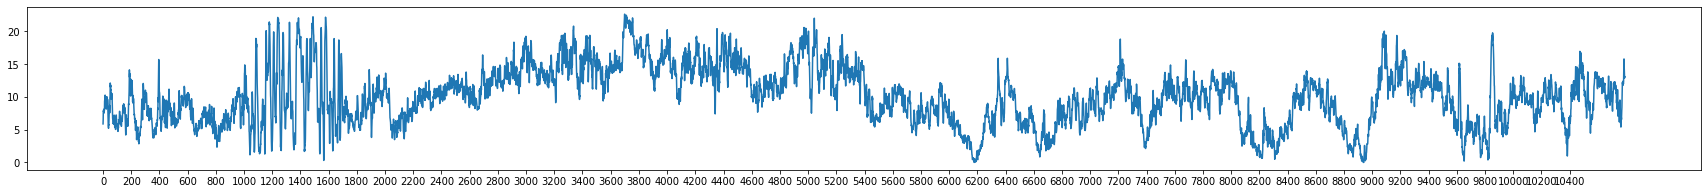

In [67]:
plt.plot(smoothed)
plt.xticks(tick)
plt.show()

In [58]:
import numpy as np

In [66]:
tick = np.arange(0, 10500, 200)